This tutorial is based on **Python for Data Analysis Part 16: Preparing Numeric Data**:
http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-16.html

In [1]:
%matplotlib inline
import numpy as np              
import pandas as pd


**Centering and Scaling**

Numeric variables are often on different scales and cover different ranges, so they can't be easily compared. What's more, variables with large values can dominate those with smaller values when using certain modeling techniques. Centering and scaling is a common preprocessing task that puts numeric variables on a common scale so no single variable will dominate the others.
The simplest way to center data is to subtract the mean value from each data point. Subtracting the mean centers the data around zero and sets the new mean to zero. 

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
0,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
2,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
3,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
4,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [3]:
df.index = df.id       # Set row index to patient ID name
df.head()

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip
id,,,,,,,,,,,,,,,,
1000,1000,203.0,82,56.0,3.6,4.31,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0
1001,1001,165.0,97,24.0,6.9,4.44,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0
1002,1002,228.0,92,37.0,6.2,4.64,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0
1003,1003,78.0,93,12.0,6.5,4.63,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0
1005,1005,249.0,90,28.0,8.9,7.72,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0


In [4]:

df_num = df[['chol', 'stab.glu', 'hdl', 'ratio', 'glyhb', 'age', 
             'height', 'weight', 'bp.1s', 'bp.1d', 'waist', 'hip']]
df_num.head()


,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
id,,,,,,,,,,,,
1000,203.0,82,56.0,3.6,4.31,46,62.0,121.0,118.0,59.0,29.0,38.0
1001,165.0,97,24.0,6.9,4.44,29,64.0,218.0,112.0,68.0,46.0,48.0
1002,228.0,92,37.0,6.2,4.64,58,61.0,256.0,190.0,92.0,49.0,57.0
1003,78.0,93,12.0,6.5,4.63,67,67.0,119.0,110.0,50.0,33.0,38.0
1005,249.0,90,28.0,8.9,7.72,64,68.0,183.0,138.0,80.0,44.0,41.0


In [5]:
# Now we'll commit a horrible sin and drop all the rows with missing values 
# without bothering to check why those values are missing.
# Remember that in real-life scenarios you should NEVER do this

df_num = df_num.dropna()

In [6]:
# Always a good idea to start by describing the dataset
df_num.describe()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000,377.000000
mean,207.740053,107.519894,50.405836,4.530504,5.595199,46.920424,66.010610,177.997347,137.395225,83.429708,37.957560,43.082228
std,44.641793,53.961080,17.414755,1.754780,2.213587,16.637532,3.910555,40.499836,23.131798,13.527984,5.761972,5.630098
min,78.000000,48.000000,12.000000,1.500000,2.680000,19.000000,52.000000,99.000000,90.000000,48.000000,26.000000,30.000000
25%,179.000000,81.000000,38.000000,3.200000,4.390000,34.000000,63.000000,151.000000,122.000000,75.000000,33.000000,39.000000
50%,204.000000,90.000000,46.000000,4.200000,4.860000,45.000000,66.000000,174.000000,136.000000,82.000000,37.000000,42.000000
75%,230.000000,108.000000,59.000000,5.400000,5.630000,60.000000,69.000000,200.000000,148.000000,92.000000,41.000000,46.000000
max,443.000000,385.000000,120.000000,19.299999,16.110001,92.000000,76.000000,325.000000,250.000000,124.000000,56.000000,64.000000


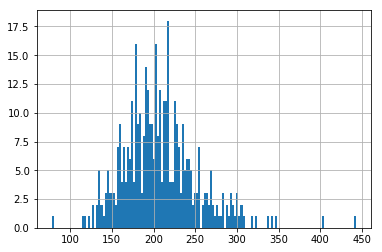

In [7]:
# Let's check for outliers
df["chol"].hist(bins=150)

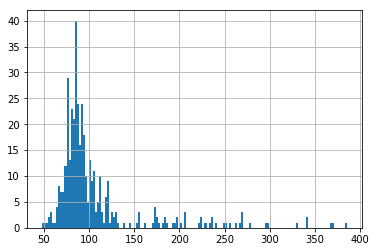

In [9]:
# Let's check for outliers
df["stab.glu"].hist(bins=150)

**Subtracting Column Means**

With the column means in hand, we just need to subtract the column means from each row in an element-wise fashion to zero center the data. Pandas performs math operations involving DataFrames and columns on an element-wise row-by-row basis by default, so we can simply subtract our column means series from the data set to center it

In [10]:
df_num.mean()

chol        207.740053
stab.glu    107.519894
hdl          50.405836
ratio         4.530504
glyhb         5.595199
age          46.920424
height       66.010610
weight      177.997347
bp.1s       137.395225
bp.1d        83.429708
waist        37.957560
hip          43.082228
dtype: float64

In [12]:
df_num.shape[0]

377

In [13]:
# Calculate column means
colmeans = df_num.sum()/df_num.shape[0]  # Get column means
colmeans

chol        207.740053
stab.glu    107.519894
hdl          50.405836
ratio         4.530504
glyhb         5.595199
age          46.920424
height       66.010610
weight      177.997347
bp.1s       137.395225
bp.1d        83.429708
waist        37.957560
hip          43.082228
dtype: float64

In [14]:
colmeans1 = df_num.mean()
colmeans1

chol        207.740053
stab.glu    107.519894
hdl          50.405836
ratio         4.530504
glyhb         5.595199
age          46.920424
height       66.010610
weight      177.997347
bp.1s       137.395225
bp.1d        83.429708
waist        37.957560
hip          43.082228
dtype: float64

In [15]:
# Subract column means

centered = df_num - colmeans
centered.describe()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02
mean,9.951368e-15,-5.126462e-15,-3.863694e-15,5.147665e-16,-3.597476e-15,-2.318216e-15,-2.412453e-15,6.031132e-16,-3.920236e-15,3.279428e-15,3.260581e-15,3.072108e-15
std,4.464179e+01,5.396108e+01,1.741475e+01,1.754780e+00,2.213587e+00,1.663753e+01,3.910555e+00,4.049984e+01,2.313180e+01,1.352798e+01,5.761972e+00,5.630098e+00
min,-1.297401e+02,-5.951989e+01,-3.840584e+01,-3.030504e+00,-2.915199e+00,-2.792042e+01,-1.401061e+01,-7.899735e+01,-4.739523e+01,-3.542971e+01,-1.195756e+01,-1.308223e+01
25%,-2.874005e+01,-2.651989e+01,-1.240584e+01,-1.330504e+00,-1.205199e+00,-1.292042e+01,-3.010610e+00,-2.699735e+01,-1.539523e+01,-8.429708e+00,-4.957560e+00,-4.082228e+00
50%,-3.740053e+00,-1.751989e+01,-4.405836e+00,-3.305042e-01,-7.351988e-01,-1.920424e+00,-1.061008e-02,-3.997347e+00,-1.395225e+00,-1.429708e+00,-9.575597e-01,-1.082228e+00
75%,2.225995e+01,4.801061e-01,8.594164e+00,8.694961e-01,3.480117e-02,1.307958e+01,2.989390e+00,2.200265e+01,1.060477e+01,8.570292e+00,3.042440e+00,2.917772e+00
max,2.352599e+02,2.774801e+02,6.959416e+01,1.476950e+01,1.051480e+01,4.507958e+01,9.989390e+00,1.470027e+02,1.126048e+02,4.057029e+01,1.804244e+01,2.091777e+01


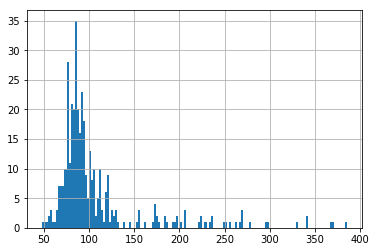

In [17]:
df_num["stab.glu"].hist(bins=150)

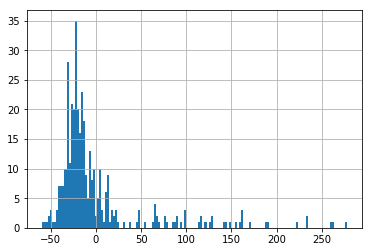

In [19]:
centered["stab.glu"].hist(bins=150)

In [18]:
df_num["chol_centered"] = df_num["chol"] - df_num["chol"].mean()
df_num["chol_centered"].describe()

count    3.770000e+02
mean     9.951368e-15
std      4.464179e+01
min     -1.297401e+02
25%     -2.874005e+01
50%     -3.740053e+00
75%      2.225995e+01
max      2.352599e+02
Name: chol_centered, dtype: float64

In [19]:
df_num["chol"].describe()

count    377.000000
mean     207.740053
std       44.641793
min       78.000000
25%      179.000000
50%      204.000000
75%      230.000000
max      443.000000
Name: chol, dtype: float64

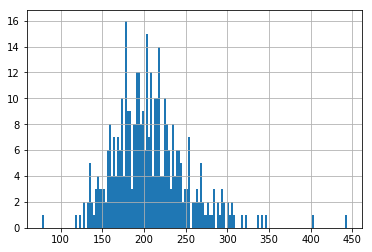

In [20]:
df_num["chol"].hist(bins=150)

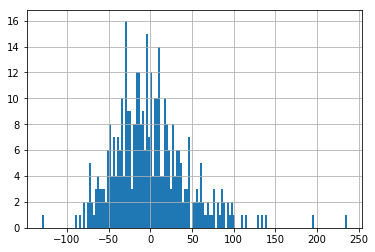

In [21]:
centered["chol"].hist(bins=150)

** Scaling using Standard Deviation **

With zero-centered data, negative values are below average and positive values are above average.
Now that the data is centered, we'd like to put it all on a common scale. One way to put data on a common scale is to divide by the standard deviation. Standard deviation is a statistic that describes the spread of numeric data. The higher the standard deviation, the further the data points tend to be spread away from the mean value. You can get standard deviations with df.std():

In [22]:
column_deviations = df_num.std(axis=0)   # Get column standard deviations

centered_and_scaled = centered/column_deviations 

centered_and_scaled.describe()

,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02
mean,4.078671e-17,-6.154817e-17,2.665124e-17,2.847707e-16,-1.644868e-15,-1.856752e-16,-6.166597e-16,1.339924e-17,-1.973075e-16,1.811107e-16,4.552798e-16,4.920909e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.906246e+00,-1.103015e+00,-2.205362e+00,-1.726999e+00,-1.316957e+00,-1.678159e+00,-3.582768e+00,-1.950560e+00,-2.048921e+00,-2.618994e+00,-2.075255e+00,-2.323623e+00
25%,-6.437925e-01,-4.914634e-01,-7.123750e-01,-7.582169e-01,-5.444554e-01,-7.765830e-01,-7.698677e-01,-6.666039e-01,-6.655438e-01,-6.231312e-01,-8.603929e-01,-7.250723e-01
50%,-8.377919e-02,-3.246765e-01,-2.529944e-01,-1.883451e-01,-3.321301e-01,-1.154272e-01,-2.713190e-03,-9.870034e-02,-6.031634e-02,-1.056852e-01,-1.661861e-01,-1.922219e-01
75%,4.986347e-01,8.897266e-03,4.934990e-01,4.955015e-01,1.572162e-02,7.861488e-01,7.644413e-01,5.432776e-01,4.584501e-01,6.335232e-01,5.280207e-01,5.182453e-01
max,5.269948e+00,5.142227e+00,3.996276e+00,8.416721e+00,4.750120e+00,2.709511e+00,2.554469e+00,3.629710e+00,4.867965e+00,2.998990e+00,3.131296e+00,3.715347e+00


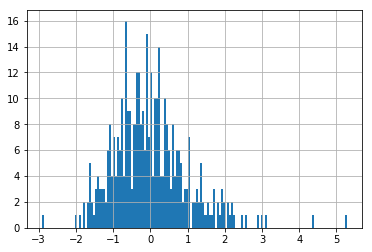

In [23]:
centered_and_scaled["chol"].hist(bins=150)

** Carefully take a look at the results above **

Notice that after dividing by the standard deviation, every variable now has a standard deviation of 1. At this point, all the columns have roughly the same mean and scale of spread about the mean.

** Let the Machine Do It**

Now that you have suffered through manually centering and scaling the data, let's take a look at performing common data preprocessing automatically using functions built into Python libraries. The Python library **scikit-learn**, a popular package for predictive modeling and data analysis, has preprocessing tools including a scale() function for centering and scaling data

In [24]:
from sklearn import preprocessing as prep

In [27]:
scaled_data = prep.scale(df_num)  # Scale the data*
print(scaled_data)

[[-0.10632082 -0.47355997  0.32165819 ... -1.80826449 -1.55666556
  -0.90388863]
 [-0.9586723  -0.19521244 -1.51830597 ... -1.14209278  1.39763399
   0.87463962]
 [ 0.45443673 -0.28799495 -0.77082053 ...  0.6343651   1.91898097
   2.47531505]
 ...
 [ 1.71053364 -0.34366445  0.20666043 ...  1.22651773 -1.03531858
  -0.0146245 ]
 [-0.30819354  2.99650596 -0.71332165 ... -0.99405463 -0.86153625
  -0.54818298]
 [-0.19604203 -0.58489898  0.09166267 ... -0.401902    0.52872236
   0.87463962]]


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [28]:
scaled_data = prep.scale(df_num)  # Scale the data*

# Note: preprocessing.scale() returns ndarrays so we have to convert it back into a DataFrame.
scaled_diabetes_df = pd.DataFrame(scaled_data,    # Remake the DataFrame
                           index=df_num.index,
                           columns=df_num.columns)

scaled_diabetes_df.describe()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


,chol,stab.glu,hdl,ratio,glyhb,age,height,weight,bp.1s,bp.1d,waist,hip
count,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02,3.770000e+02
mean,4.763357e-17,-1.172066e-16,-7.546277e-18,2.994952e-16,-5.771982e-17,-1.613799e-16,-6.343290e-16,8.834666e-19,-1.949516e-16,1.094026e-16,4.649979e-16,4.588137e-16
std,1.001329e+00,1.001329e+00,1.001329e+00,1.001329e+00,1.001329e+00,1.001329e+00,1.001329e+00,1.001329e+00,1.001329e+00,1.001329e+00,1.001329e+00,1.001329e+00
min,-2.910109e+00,-1.104481e+00,-2.208293e+00,-1.729294e+00,-1.318707e+00,-1.680389e+00,-3.587529e+00,-1.953152e+00,-2.051644e+00,-2.622474e+00,-2.078013e+00,-2.326711e+00
25%,-6.446481e-01,-4.921165e-01,-7.133216e-01,-7.592245e-01,-5.451789e-01,-7.776150e-01,-7.708908e-01,-6.674897e-01,-6.664283e-01,-6.239592e-01,-8.615363e-01,-7.260358e-01
50%,-8.389052e-02,-3.251080e-01,-2.533306e-01,-1.885954e-01,-3.325715e-01,-1.155806e-01,-2.716796e-03,-9.883150e-02,-6.039650e-02,-1.058257e-01,-1.664069e-01,-1.924773e-01
75%,4.992973e-01,8.909090e-03,4.941548e-01,4.961599e-01,1.574251e-02,7.871935e-01,7.654572e-01,5.439995e-01,4.590593e-01,6.343651e-01,5.287224e-01,5.189340e-01
max,5.276952e+00,5.149060e+00,4.001587e+00,8.427907e+00,4.756432e+00,2.713112e+00,2.557863e+00,3.634533e+00,4.874434e+00,3.002976e+00,3.135457e+00,3.720285e+00


**Carefully take a look at the results above**

Notice that the values are almost the same as those we calculated manually but not exactly the same. These small differences are likely due to rounding and details of the scikit-learn implementation of centering and scaling.